# Upload dataset (contains title/tags/heading/source/text/bias rating for ~20,000 articles) and explore counts across topic, bias rating

In [ ]:
#Upload file

from google.colab import files

uploaded = files.upload()
print(uploaded.keys())

import io
import pandas as pd

df = pd.read_csv(io.BytesIO(uploaded['all_sides_2022 (2).csv']))

Saving all_sides_2022.csv to all_sides_2022 (2).csv
dict_keys(['all_sides_2022 (2).csv'])


In [ ]:
#Peek at df

df

,Unnamed: 0,title,tags,heading,source,text,bias_rating
0,0,Gun Violence Over Fourth of July Weekend,"['Protests', 'Fourth Of July', 'Gun Control An...",Chicago Gun Violence Spikes and Increasingly F...,New York Times (News),As Yasmin Miller drove home from a laundromat ...,left
1,1,Gun Violence Over Fourth of July Weekend,"['Protests', 'Fourth Of July', 'Gun Control An...",‘Bullets just came from nowhere’: Fourth of Ju...,Chicago Tribune,As many Chicagoans were celebrating the Fourth...,center
2,2,Gun Violence Over Fourth of July Weekend,"['Protests', 'Fourth Of July', 'Gun Control An...",Dozens of shootings across US mark bloody July...,New York Post (News),The nation’s 4th of July weekend was marred by...,right
3,3,Yellen Warns Congress of 'Economic Recession' ...,"['Janet Yellen', 'Debt Ceiling', 'Economic Pol...",Federal Government Will Run Out of Cash on Oct...,The Epoch Times,Treasury Secretary Janet Yellen on Tuesday war...,right
4,4,Yellen Warns Congress of 'Economic Recession' ...,"['Janet Yellen', 'Debt Ceiling', 'Economic Pol...",Yellen tells Congress that U.S. will run out o...,Washington Post,Treasury Secretary Janet Yellen on Tuesday tol...,left
...,...,...,...,...,...,...,...
21749,21749,Biden Seeks $30 Billion For Disaster Aid And R...,"['Disaster', 'Joe Biden', 'Disaster Aid', 'Afg...",White House asks Congress to pass emergency fu...,Washington Post,The White House budget office Tuesday sent Con...,left
21750,21750,Biden Seeks $30 Billion For Disaster Aid And R...,"['Disaster', 'Joe Biden', 'Disaster Aid', 'Afg...","Biden wants $30B for disaster aid, Afghan rese...",Washington Examiner,The White House budget office on Tuesday urged...,right
21751,21751,US House Condemns QAnon Group,"['US House', 'QAnon', 'Free Speech', 'Politics']",Seventeen Republican congressmen and Justin Am...,Washington Examiner,The House passed a resolution condemning the c...,right
21752,21752,US House Condemns QAnon Group,"['US House', 'QAnon', 'Free Speech', 'Politics']",Why did some Republicans balk at a resolution ...,NBC News (Online),As many Americans came to realize in recent mo...,left


In [ ]:
#Gauge topic breakdown, most popular topics

from collections import Counter
import ast
import pandas as pd

tag_counts = Counter()

for tags in df['tags']:
    tag_list = ast.literal_eval(tags)
    tag_counts.update(tag_list)

tag_counts_df = pd.DataFrame(tag_counts.items(), columns=['Tag', 'Count']).sort_values(by='Count', ascending=False)

tag_counts_df.head(30)

,Tag,Count
13,Politics,4089
51,Elections,3187
47,Donald Trump,2240
98,Coronavirus,2139
60,World,1936
9,Economy And Jobs,1880
50,Presidential Elections,1698
27,Joe Biden,1597
43,White House,1580
45,Public Health,1047


In [ ]:
#Filtered df, by tags. Ultimately chose to use the full set

specified_tags = {'Gun Control', 'Politics', 'Elections'}  #adjust as needed

def has_specified_tags(tags):
    tag_list = ast.literal_eval(tags)
    return any(tag in specified_tags for tag in tag_list)

df_filtered = df[df['tags'].apply(has_specified_tags)]

df_filtered.head()

,Unnamed: 0,title,tags,heading,source,text,bias_rating
6,6,Night 2: Christie on Hillary,"['Republican Party', 'Politics']",Washed-Up Chris Christie Rips Into Hillary Cli...,Daily Beast,"It was surely different from 2012.\nBack then,...",left
7,7,Night 2: Christie on Hillary,"['Republican Party', 'Politics']","Christie convicts Clinton, but was he 'guilty'...",Fox News (Online News),Chris Christie wasn’t the only one prosecuting...,right
8,8,Night 2: Christie on Hillary,"['Republican Party', 'Politics']",Anti-Clinton Republican National Convention Cr...,HuffPost,The crowd at the 2016 Republican National Conv...,left
12,12,Mike Pence Defends Barring Pride Flags At US E...,"['Pride Flag', 'Mike Pence', 'State Department...",'One American flag flies': Pence defends barri...,NBC News (Online),Vice President Mike Pence voiced support Monda...,left
13,13,Mike Pence Defends Barring Pride Flags At US E...,"['Pride Flag', 'Mike Pence', 'State Department...",Mike Pence says banning pride flags at US emba...,USA TODAY,"In a Monday evening television interview, Vice...",left


In [ ]:
#Check counts for each form of bias

df['bias_rating'].value_counts()

,count
bias_rating,
left,10275
right,7226
center,4253


# Data Preprocessing

In [ ]:
#!pip install spacy
#!python -m spacy download en_core_web_sm

In [ ]:
#Balance the dataset (center, left, right)

min_count = df["bias_rating"].value_counts().min()

#Sample min_count instances from each class
df_sample = (
    df.groupby("bias_rating")
    .apply(lambda x: x.sample(n=min_count, random_state=42))
    .reset_index(drop=True)
)

#Check class distribution
print(df_sample["bias_rating"].value_counts())

bias_rating
center    4253
left      4253
right     4253
Name: count, dtype: int64


<ipython-input-11-26c3ec19e72e>:8: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(lambda x: x.sample(n=min_count, random_state=42))


In [ ]:
#Pre-processing with spaCy

import spacy

nlp = spacy.load("en_core_web_sm", disable=["ner", "parser"])

def preprocess_texts(texts):
    processed_texts = []
    for doc in nlp.pipe(texts, batch_size=1000):
        tokens = [token.lemma_ for token in doc if token.is_alpha]  #Lemmatization & remove punctuation/numbers
        processed_texts.append(" ".join(tokens))
    return processed_texts

df_sample['processed_text'] = preprocess_texts(df_sample['text'].astype(str))
df_sample['processed_text']

,processed_text
0,the Trump administration on Tuesday propose re...
1,Donald Trump Jr early evening prediction of a ...
2,the Justice Department on Thursday accuse Yale...
3,Stacey Abrams apologize Tuesday for appear mas...
4,Kayla Jean Mueller the last american hostage k...
...,...
12754,President Joe Biden sign an executive order Fr...
12755,justice Sandra Day the first woman to serve on...
12756,fighter jet have begin pound artillery hold by...
12757,President Obama follow through on his vow to s...


In [ ]:
#Processing news *headlines*, rather than mere text

df_sample['processed_heading'] = preprocess_texts(df_sample['heading'].astype(str))
df_sample['processed_heading']

,processed_heading
0,trump move to relax Obama era water protection
1,Red wave optimism Quickly Fizzles among Republ...
2,DOJ claim Yale discriminate against asian and ...
3,Abrams Apologizes for Maskless Photo Op with S...
4,confirm Death of American Hostage Kayla Mueller
...,...
12754,Biden Orders Frozen Afghan Funds Split between...
12755,justice Sandra Day have begin stage of dementia
12756,F jet drop pund laser guide bomb on ISIL
12757,I have promise obama to announce executive act...


# TF-IDF (Bag of Words) + Logistic Regression (Basline) - Text

In [ ]:
#Convert text to TF-IDF features
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score

X = df_sample['processed_text']  #features (cleaned text)
y = df_sample['bias_rating']  #labels (left, center, right)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

vectorizer = TfidfVectorizer(
    max_features=10000,
    ngram_range=(1,3),   #use unigrams, bigrams, *and trigrams*
    stop_words='english' #removing common words
)

X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

print(f"TF-IDF shape (Train): {X_train_tfidf.shape}, (Test): {X_test_tfidf.shape}")


TF-IDF shape (Train): (10207, 10000), (Test): (2552, 10000)


In [ ]:
#Train Logistic Regression model
model = LogisticRegression(max_iter=1000, class_weight='balanced')
model.fit(X_train_tfidf, y_train)

y_pred = model.predict(X_test_tfidf)

In [ ]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.45101880877742945

Classification Report:
               precision    recall  f1-score   support

      center       0.45      0.47      0.46       850
        left       0.46      0.45      0.46       851
       right       0.44      0.43      0.44       851

    accuracy                           0.45      2552
   macro avg       0.45      0.45      0.45      2552
weighted avg       0.45      0.45      0.45      2552



# TF-IDF (Bag of Words) + Logistic Regression (Baseline) - Headlines

In [ ]:
#convert text to TF-IDF features
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score

X = df_sample['processed_heading']  # features (cleaned text)
y = df_sample['bias_rating']  # labels (left, center, right)

#split into Train & Test sets (80/20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

#convert text into TF-IDF features, increase features and include trigrams
vectorizer = TfidfVectorizer(
    max_features=10000,
    ngram_range=(1,3),   # use unigrams, bigrams, and trigrams
    stop_words='english' # removing common words
)

X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

print(f"TF-IDF shape (Train): {X_train_tfidf.shape}, (Test): {X_test_tfidf.shape}")


TF-IDF shape (Train): (10207, 10000), (Test): (2552, 10000)


In [ ]:
#train Logistic Regression model
model = LogisticRegression(max_iter=1000, class_weight='balanced')
model.fit(X_train_tfidf, y_train)

y_pred = model.predict(X_test_tfidf)

In [ ]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.3785266457680251

Classification Report:
               precision    recall  f1-score   support

      center       0.42      0.45      0.43       850
        left       0.37      0.36      0.37       851
       right       0.34      0.32      0.33       851

    accuracy                           0.38      2552
   macro avg       0.38      0.38      0.38      2552
weighted avg       0.38      0.38      0.38      2552



# Random Forrest Classifier - Headlines

In [ ]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=200, random_state=42)
model.fit(X_train_tfidf, y_train)
y_pred = model.predict(X_test_tfidf)

In [ ]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.3887147335423197

Classification Report:
               precision    recall  f1-score   support

      center       0.40      0.52      0.45       850
        left       0.38      0.33      0.36       851
       right       0.38      0.31      0.34       851

    accuracy                           0.39      2552
   macro avg       0.39      0.39      0.38      2552
weighted avg       0.39      0.39      0.38      2552



# SVM - Headlines

In [ ]:
from sklearn.svm import SVC

model = SVC(kernel='linear', class_weight='balanced')  #Linear Kernel, works best for text
model.fit(X_train_tfidf, y_train)
y_pred = model.predict(X_test_tfidf)

In [ ]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.39184952978056425

Classification Report:
               precision    recall  f1-score   support

      center       0.43      0.48      0.45       850
        left       0.38      0.37      0.38       851
       right       0.36      0.33      0.34       851

    accuracy                           0.39      2552
   macro avg       0.39      0.39      0.39      2552
weighted avg       0.39      0.39      0.39      2552



# Fine-Tuned DistilBert Model

In [ ]:
#!pip install transformers torch shap

In [ ]:
#!pip install datasets

In [ ]:
import torch
from transformers import DistilBertTokenizerFast

In [ ]:
from datasets import Dataset, ClassLabel

In [ ]:
#convert DataFrame to Dataset
dataset = Dataset.from_pandas(df_sample)

#define ClassLabel feature for bias_rating
class_label = ClassLabel(names=["left", "center", "right"])
dataset = dataset.cast_column("bias_rating", class_label)

Casting the dataset:   0%|          | 0/12759 [00:00<?, ? examples/s]

In [ ]:
#tokenize anew, using distilbert's tokenizer

import torch

tokenizer = DistilBertTokenizerFast.from_pretrained("distilbert-base-uncased")

def tokenize_function(examples):
    tokenized_inputs = tokenizer(
        examples["processed_heading"],
        padding="max_length",
        truncation=True,
        max_length=512
    )

    tokenized_inputs["labels"] = list(examples["bias_rating"])
    return tokenized_inputs

tokenized_datasets = dataset.map(tokenize_function, batched=True)

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/483 [00:00<?, ?B/s]

Map:   0%|          | 0/12759 [00:00<?, ? examples/s]

In [ ]:
tokenized_datasets = dataset.map(tokenize_function, batched=True)

tokenized_datasets = tokenized_datasets.train_test_split(test_size=0.2, stratify_by_column="bias_rating")

Map:   0%|          | 0/12759 [00:00<?, ? examples/s]

In [ ]:
columns_to_remove = ["title", "tags", "source", "text", "heading", "processed_text", "processed_heading", "Unnamed: 0"]
tokenized_datasets = tokenized_datasets.remove_columns([col for col in columns_to_remove if col in tokenized_datasets.column_names])

#convert dataset into PyTorch format
tokenized_datasets.set_format(type="torch", columns=["input_ids", "attention_mask", "labels"])

In [ ]:
from transformers import DistilBertForSequenceClassification

#load DistilBERT with 3 output labels (left, center, right)
model = DistilBertForSequenceClassification.from_pretrained("distilbert-base-uncased", num_labels=3)

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [ ]:
#Initialize and fine-tune training arguments for model

from transformers import TrainingArguments

training_args = TrainingArguments(
    output_dir="./results",
    evaluation_strategy="epoch",
    per_device_train_batch_size=8,  #can increase this if using GPU?
    per_device_eval_batch_size=8,
    num_train_epochs=3,   #need more, but poor compute time
    weight_decay=0.01,
    logging_dir="./logs",
    save_strategy="epoch",
    load_best_model_at_end=True,
    report_to="none",
)

/usr/local/lib/python3.11/dist-packages/transformers/training_args.py:1575: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(


In [ ]:
if "train" not in tokenized_datasets or "test" not in tokenized_datasets:
    tokenized_datasets = tokenized_datasets.train_test_split(test_size=0.2, stratify_by_column="bias_rating")

In [ ]:
#Train model

from transformers import Trainer

trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=tokenized_datasets["train"],
    eval_dataset=tokenized_datasets["test"],
)

trainer.train()


Epoch,Training Loss,Validation Loss
1,1.096700,1.081751
2,1.012900,1.082532
3,0.762900,1.278746


TrainOutput(global_step=3828, training_loss=0.9642348414055357, metrics={'train_runtime': 1518.8983, 'train_samples_per_second': 20.16, 'train_steps_per_second': 2.52, 'total_flos': 4056356552315904.0, 'train_loss': 0.9642348414055357, 'epoch': 3.0})

In [ ]:
#training is time intensive, save to reload as needed
trainer.save_model("bert_model_tri")

In [ ]:
import numpy as np
from sklearn.metrics import classification_report

#get predictions
preds = trainer.predict(tokenized_datasets["test"]).predictions
y_pred = np.argmax(preds, axis=1)
y_test = tokenized_datasets["test"]["labels"]

print(classification_report(y_test, y_pred, target_names=["left", "center", "right"]))


              precision    recall  f1-score   support

        left       0.44      0.23      0.30       850
      center       0.47      0.23      0.31       851
       right       0.37      0.73      0.49       851

    accuracy                           0.40      2552
   macro avg       0.42      0.40      0.37      2552
weighted avg       0.42      0.40      0.37      2552



# SHAP Feature Importance



In [ ]:
#!pip install shap

In [ ]:
import shap
import numpy as np

#convert a subset of training data into a dense NumPy array
background_data = vectorizer.transform(df_sample["processed_heading"].iloc[:100].tolist()).toarray()  # Convert to dense


In [ ]:
# Select raw text samples
sample_texts = df_sample["processed_heading"].iloc[:20].tolist()

print(sample_texts)

['trump move to relax Obama era water protection', 'Red wave optimism Quickly Fizzles among Republicans here why', 'DOJ claim Yale discriminate against asian and white applicant', 'Abrams Apologizes for Maskless Photo Op with Schoolkids change Tune after criticize False Political Attack', 'confirm Death of American Hostage Kayla Mueller', 'trump I never ask Comey to stop investigate Flynn', 'Fauci to retire before the end of Biden term', 'White House People likely to need annual booster', 'why do GOP Lawmakers still oppose Legalizing Weed', 'official say option under consideration in Syria would not require a coalition to be effective', 'what the poll show and the press miss again', 'NY AG uncover billion in Sackler family wire transfer amid opioid probe report', 'Attorney General William Barr resign effective', 'as New Iran Sanctions Loom aim to Plug Gaps', 'Health Insurers Struggle to profit from ACA plan', 'final evacuation resume after deadly Kabul attack', 'House republican leader

,processed_heading
0,trump move to relax Obama era water protection
1,Red wave optimism Quickly Fizzles among Republ...
2,DOJ claim Yale discriminate against asian and ...
3,Abrams Apologizes for Maskless Photo Op with S...
4,confirm Death of American Hostage Kayla Mueller
...,...
12754,Biden Orders Frozen Afghan Funds Split between...
12755,justice Sandra Day have begin stage of dementia
12756,F jet drop pund laser guide bomb on ISIL
12757,I have promise obama to announce executive act...


In [ ]:
#create SHAP explainer for Logistic Regression with the background dataset
explainer = shap.Explainer(model.predict_proba, background_data)


In [ ]:
#convert the selected sample texts into a TF-IDF dense matrix
sample_features = vectorizer.transform(sample_texts).toarray()

In [ ]:
#Get the number of features in vectorizer
num_features = sample_features.shape[1]
required_evals = 2 * num_features + 1  # This satisfies SHAP's requirement

#Compute SHAP values with adjusted max_evals
shap_values = explainer(sample_features, max_evals=required_evals)


PermutationExplainer explainer: 21it [34:36, 103.82s/it]


# Visualizing SHAP Values

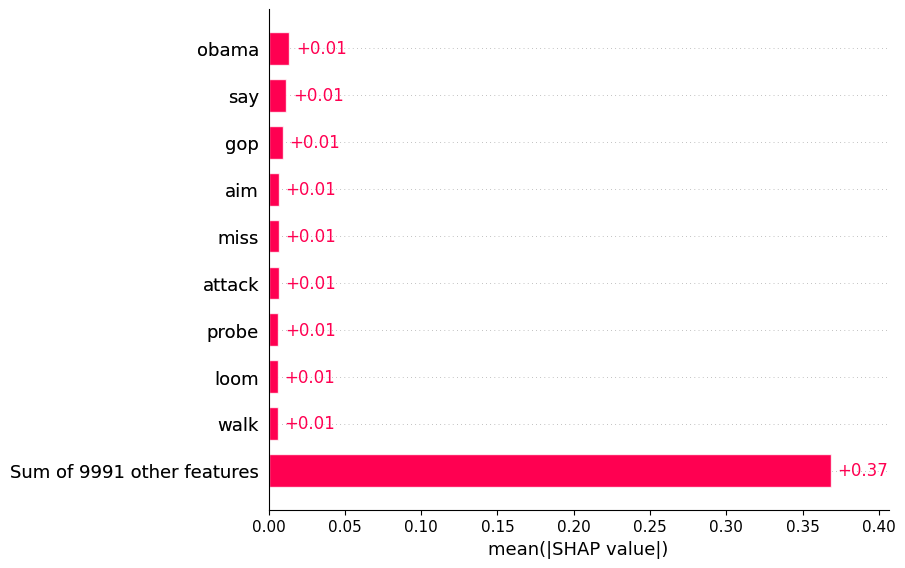

In [ ]:
#Left bias plot

shap_class_0_values = shap_values.values[:, :, 0]  #Extract for class 0

shap_class_0_explainer = shap.Explanation(values=shap_class_0_values, base_values=None, feature_names=vectorizer.get_feature_names_out())

shap.plots.bar(shap_class_0_explainer)


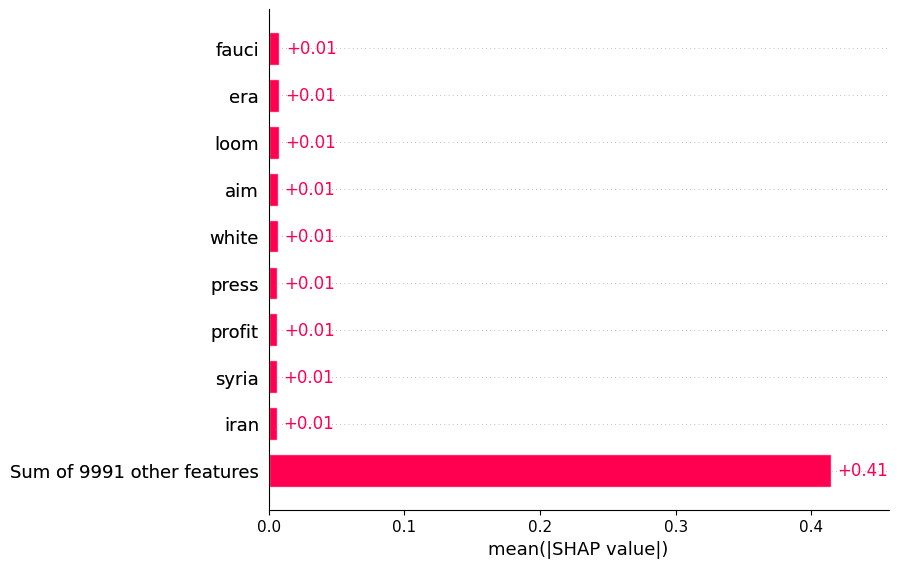

In [ ]:
#Center bias plot
shap_class_1_values = shap_values.values[:, :, 1]

shap_class_1_explainer = shap.Explanation(
    values=shap_class_1_values, base_values=None, feature_names=vectorizer.get_feature_names_out()
)

shap.plots.bar(shap_class_1_explainer)


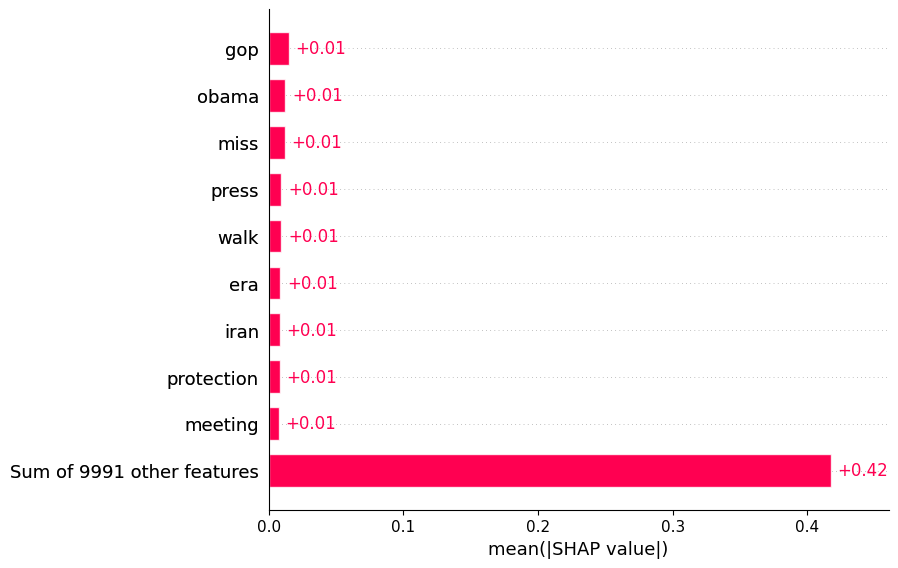

In [ ]:
#Right bias plot
shap_class_2_values = shap_values.values[:, :, 2]

shap_class_2_explainer = shap.Explanation(
    values=shap_class_2_values, base_values=None, feature_names=vectorizer.get_feature_names_out()
)

shap.plots.bar(shap_class_2_explainer)


In [ ]:
#Check that this is wrapped correctly before passing into summary_plot

import numpy as np

print("SHAP values shape:", shap_values.values.shape)
print("Feature matrix shape:", sample_features.shape)

shap_importance = np.abs(shap_values.values).mean(axis=2)

print("Updated SHAP values shape:", shap_importance.shape)  # Expected: (num_samples, num_features)

SHAP values shape: (20, 10000, 3)
Feature matrix shape: (20, 10000)
Updated SHAP values shape: (20, 10000)


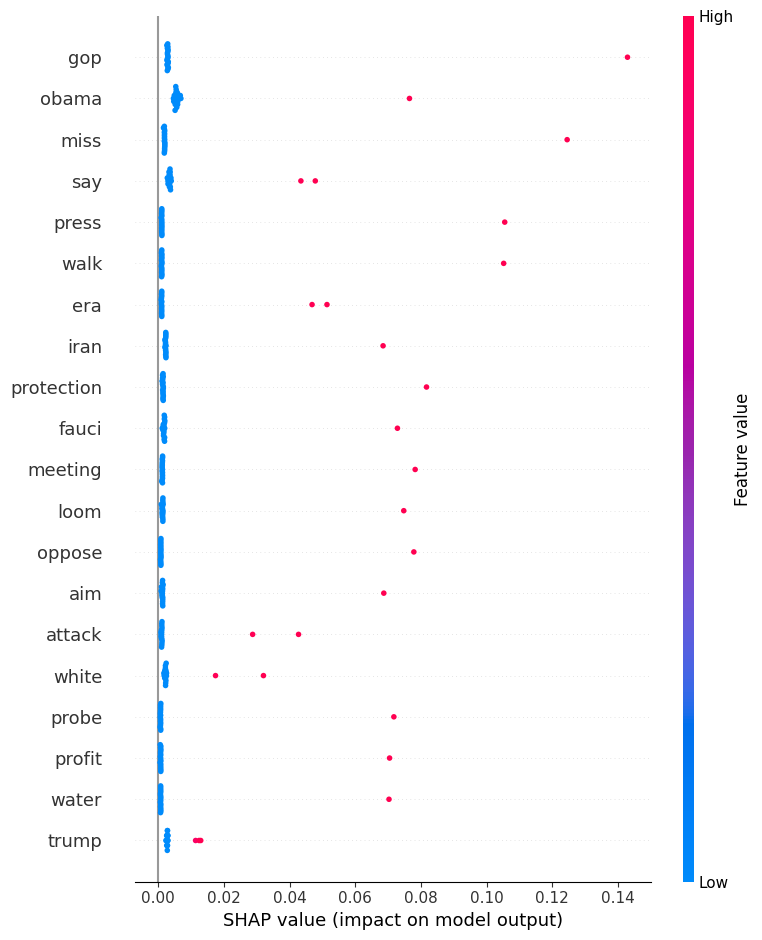

In [ ]:
#Complete summary plot

shap.summary_plot(shap_importance, features=sample_features, feature_names=vectorizer.get_feature_names_out())

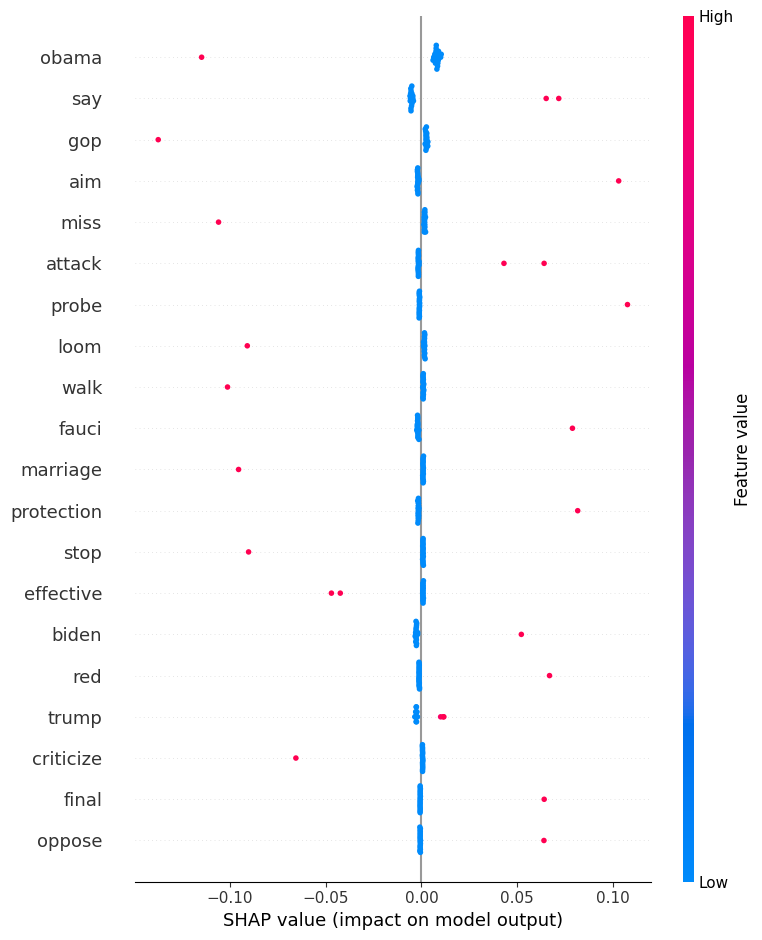

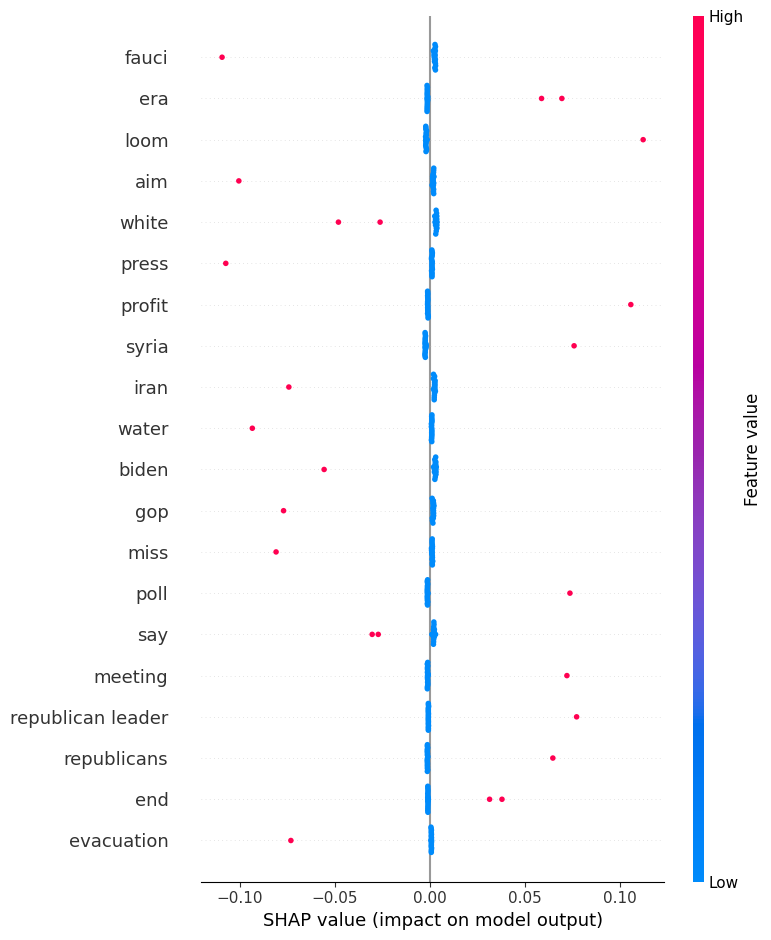

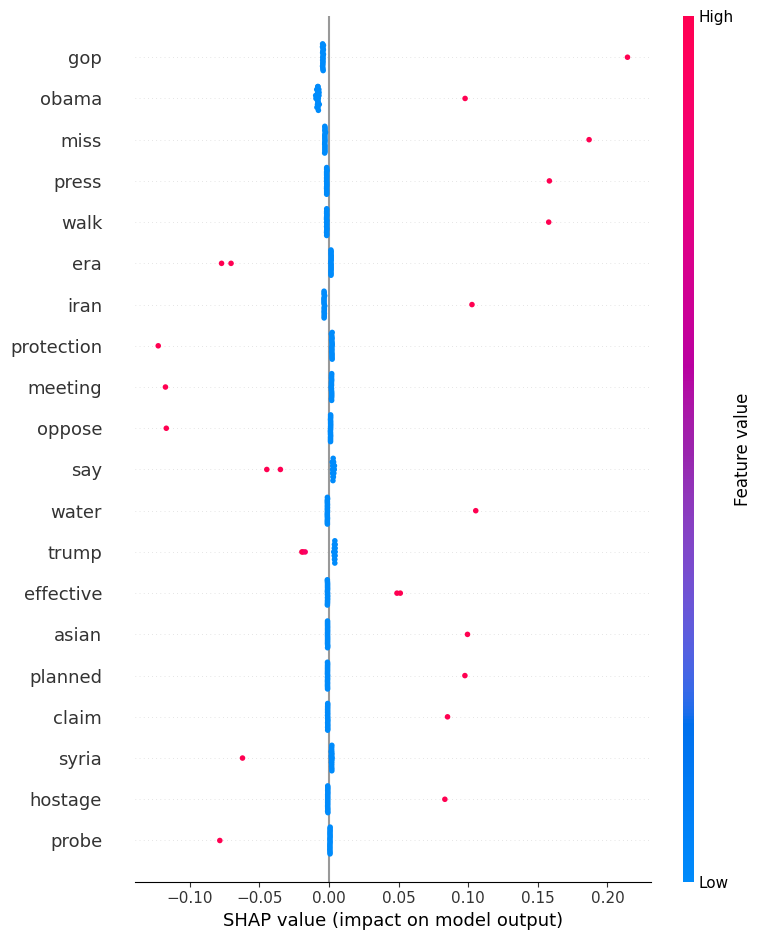

In [ ]:
#Summary plots by catgeory

shap.summary_plot(shap_values.values[:, :, 0], features=sample_features, feature_names=vectorizer.get_feature_names_out())  # Left bias

shap.summary_plot(shap_values.values[:, :, 1], features=sample_features, feature_names=vectorizer.get_feature_names_out())  # Center bias

shap.summary_plot(shap_values.values[:, :, 2], features=sample_features, feature_names=vectorizer.get_feature_names_out())  # Right bias
